<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas

In [2]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 14.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 18.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# WEEK 1: Data Set Up

Select companies that I am personally interested in that have large market share of their respective industries and have stable data to train my model. While I am interested, for the purposes of this study, I excluded companies that experienced abnormal volatility like TSLA, AMC, GME, because they are outliers and would not be a good train data set for the models. From research, it appears like LSTM is often recommended for predicting stock prices so I studied up on that and plan on building that to compare. 

In [43]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy.stats import norm

In [50]:
tickers = ['AAPL', 'FB', 'MSFT','V', 'DIS', 'NVDA']
data = []
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 11, 26)

for t in tickers:
  data.append(web.DataReader(t, 'yahoo', start, end))

for i in data:
  print(i)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2018-01-02  172.300003  169.259995  ...   25555934.0  168.779846
2018-01-03  174.550003  171.960007  ...   29517899.0  168.750473
2018-01-04  173.470001  172.080002  ...   22434597.0  169.534302
2018-01-05  175.369995  173.050003  ...   23660018.0  171.464508
2018-01-08  175.610001  173.929993  ...   20567766.0  170.827667
...                ...         ...  ...          ...         ...
2021-11-19  161.020004  156.532806  ...  117305597.0  160.550003
2021-11-22  165.699997  161.000000  ...  117467889.0  161.020004
2021-11-23  161.800003  159.060104  ...   96041899.0  161.410004
2021-11-24  162.139999  159.639999  ...   69463623.0  161.940002
2021-11-26  160.449997  156.360001  ...   76959752.0  156.809998

[984 rows x 6 columns]
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2018-01

I will be using Adj Close as the standard for the daily stock price. Close seems like a better option than Open because Open does not include what happens on that given that obviously, and Adj Close accounts for corporate activity, etc so that it is a more accurate representation of the stock's value.  

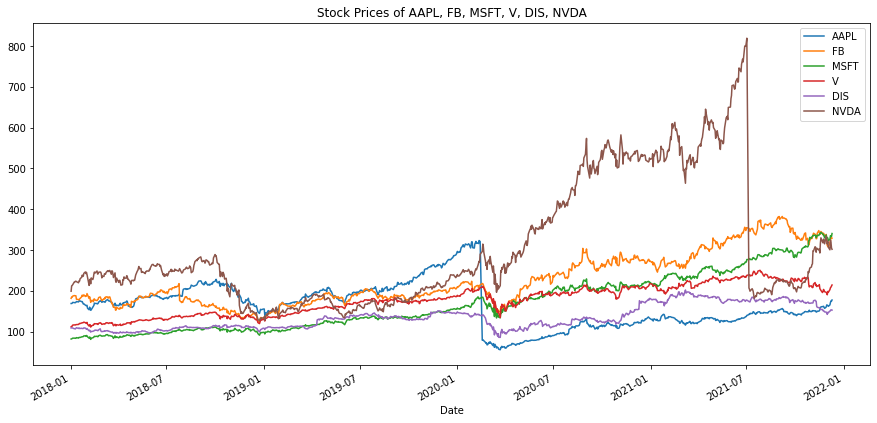

In [6]:
for index, val in enumerate(data):
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
plt.title('Stock Prices of ' + ', '.join(tickers))
plt.legend()

# WEEK 2: Basic Stock and Metrics Analysis 

As I am unfamiliar with the basics of stocks, I studied up on various ways of visualizing stocks and metrics that indcate the trends and values of stocks. 

First I start off by plotting the volume of each stock to observe the overall interest and activity of each stock. Here it appears like over the past 3 years, AAPL's volume trumps all the rest with NVDA at second and FB and MSFT fighting for third

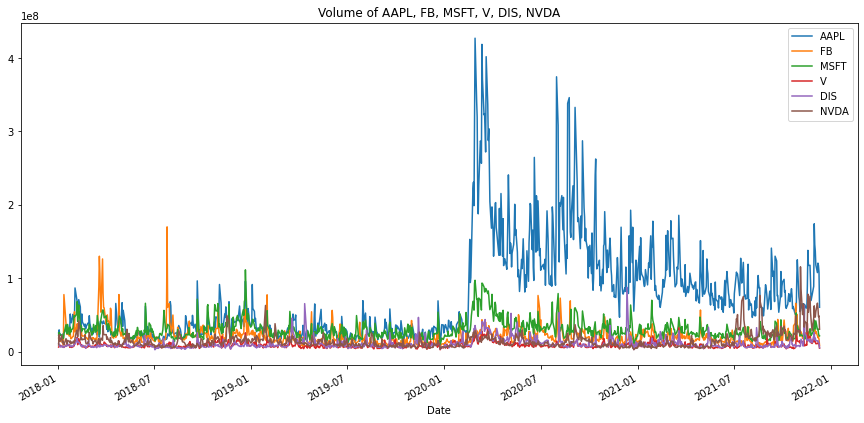

In [7]:
for index, val in enumerate(data):
  val['Volume'].plot(label=tickers[index], figsize=(15,7))
plt.title('Volume of ' + ', '.join(tickers))
plt.legend()

Next, we plot a 6 x 6  scatter matrix of the 6 companies to observe the correlation between the stocks. As expected, tech companies like AAPL, FB, NVDA, and MSFT all seem very positively correlated with each combination forming a straight line. V and DIS do not exhibit a strong correlation with the rest, and DIS especially seems to lack correlation with the rest of the stocks. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f5fdee310>,
      dtype=object)

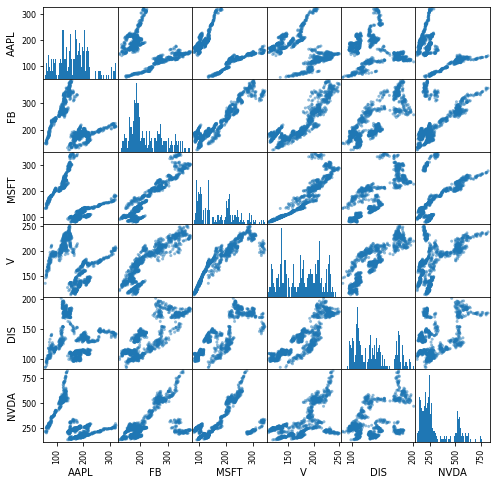

In [8]:
scatter_data = pd.concat([val['Adj Close'] for val in data],axis = 1)
scatter_data.columns = tickers

scatter_matrix(scatter_data, figsize = (8,8), hist_kwds= {'bins':250})

Next we observe the percentage increase in each stock's value throughout the past 3 years. This value is achieved by comparing a given day's price with the previous day's and creating a histogram of the percent difference data. Here Facebook seems to have the highest volatility, an its x range seems to be largest, and AAPL and NVDA appear to be the best performing when looking at positive side vs the negative side

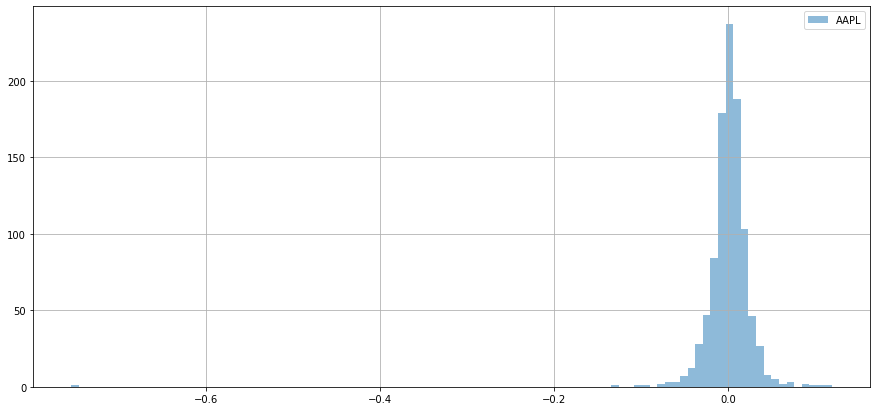

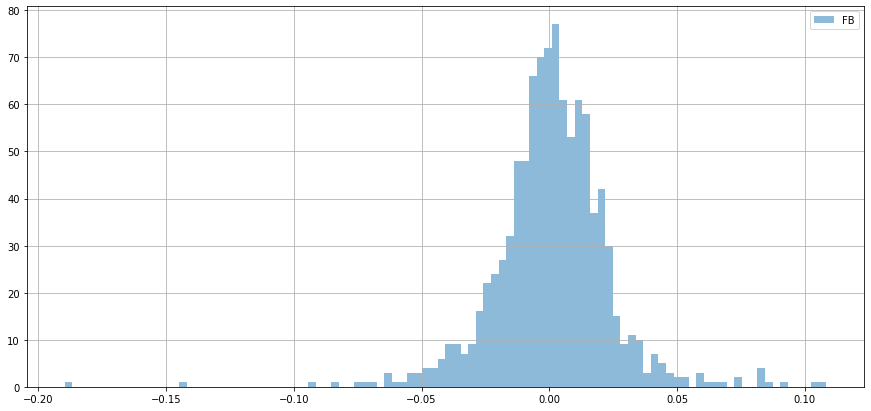

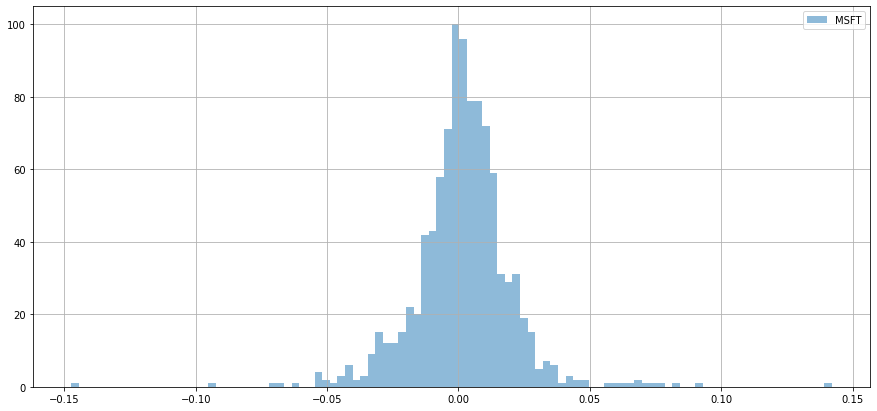

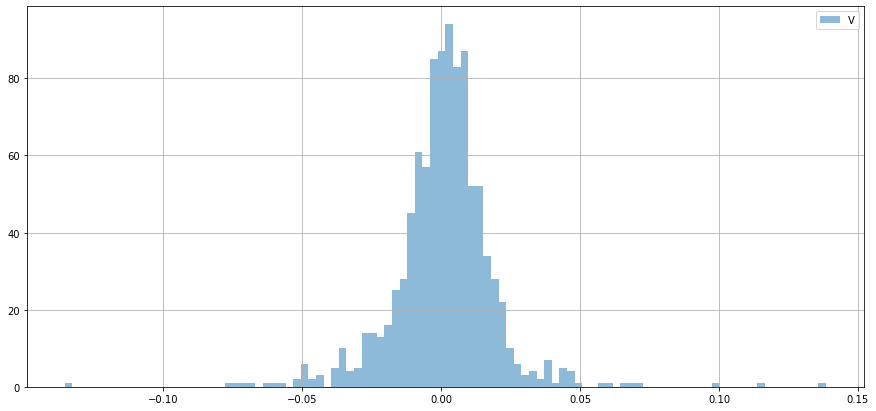

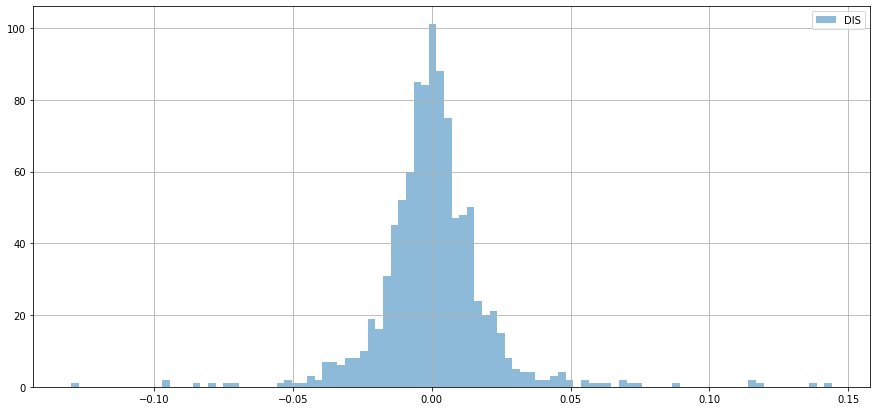

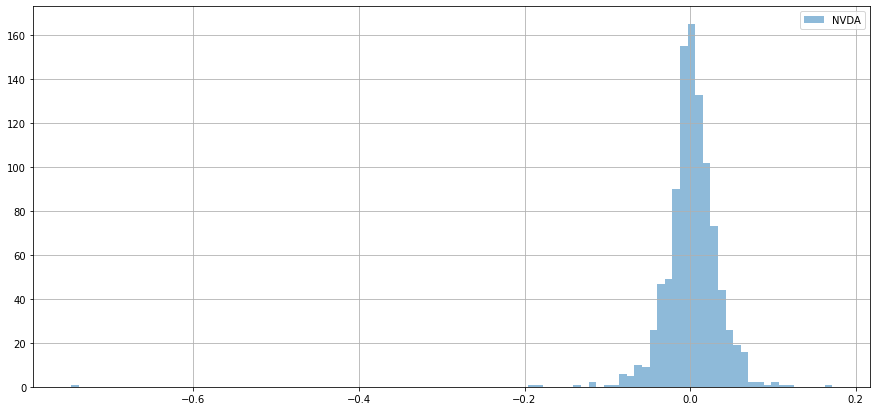

In [9]:
for index, val in enumerate(data):
  returns = (val['Adj Close']/val['Adj Close'].shift(1))-1
  returns.hist(bins = 100, label = tickers[index], alpha = 0.5, figsize = (15,7))
  plt.legend()
  plt.show()

Next we calculate the moving average data for each of the stocks and plot it over the 3 year window to observe trends. Rather than looking at each individual day's stock price, the moving average smoothes the line out by taking a look at the average of previous x number of days for the given day. The blue daily data fluctuates much more than the orange 50 moving average data, and the green 100 moving average data is much more stable than the rest. These provide us with an easy snapshot of the trend of the stock. 

Few interesting observations: When looking at the green data, they mostly rise over the past couple years due to the stock boom that resulted from COVID. Orange lines all trend up as well except for the noticeable dip around 03/2020 when COVID first broke in the US. While most recovered quickly, DIS expectedly took the hardest fall and took the longest to recover

As of recent, FB, V, and DIS seem to trend downward, while AAPL and MSFT are showing a strong positive trend with NVDA trending upward exponentially.

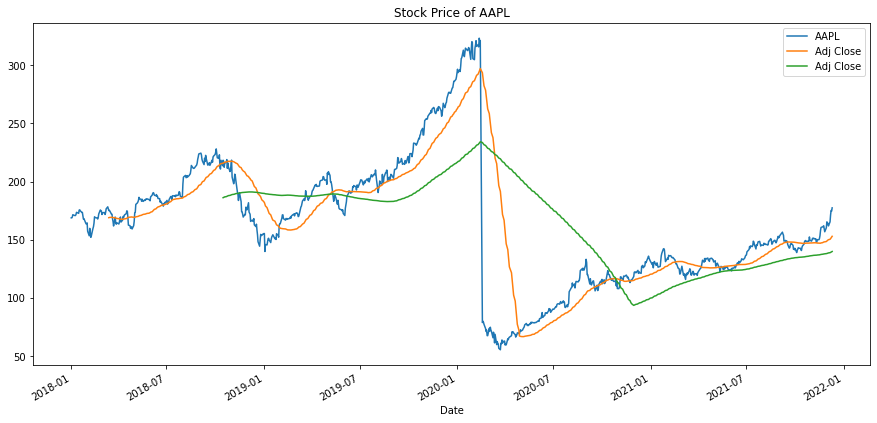

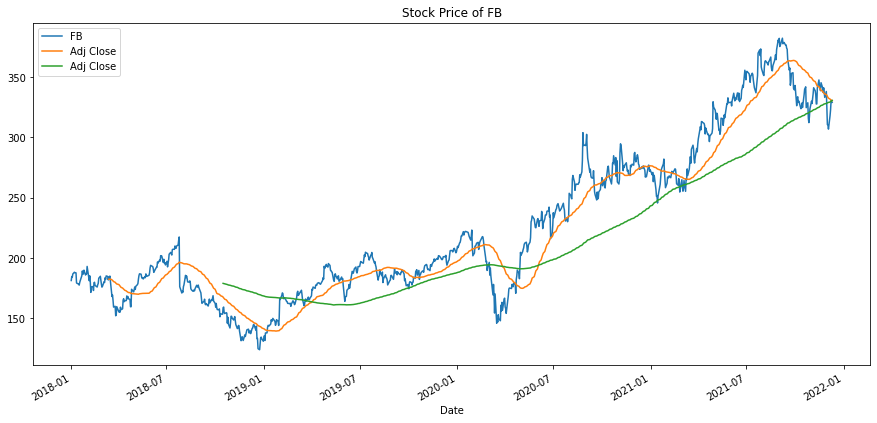

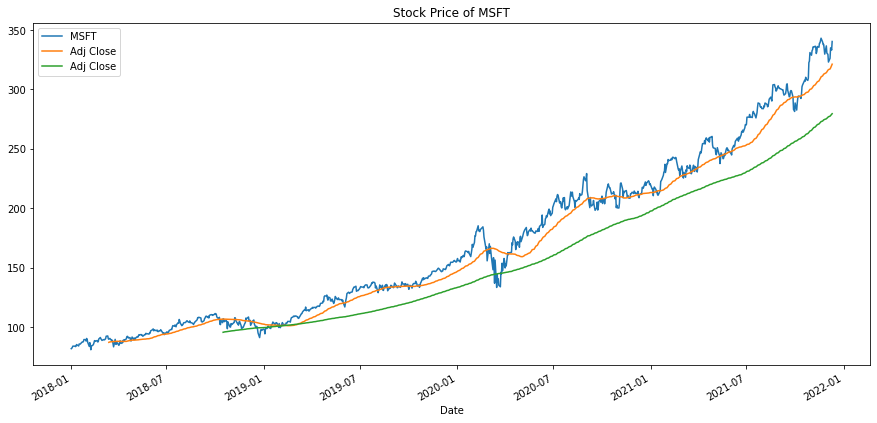

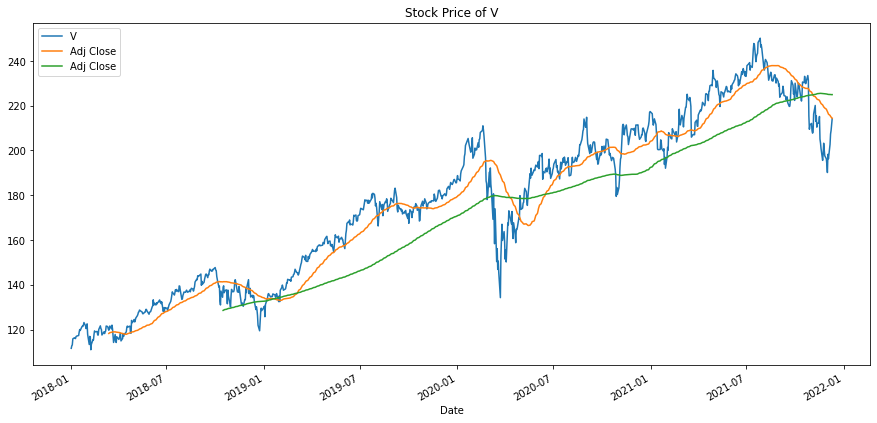

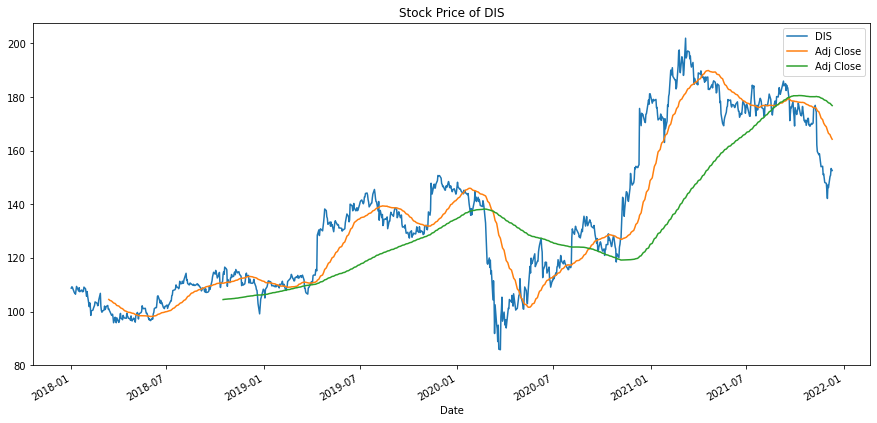

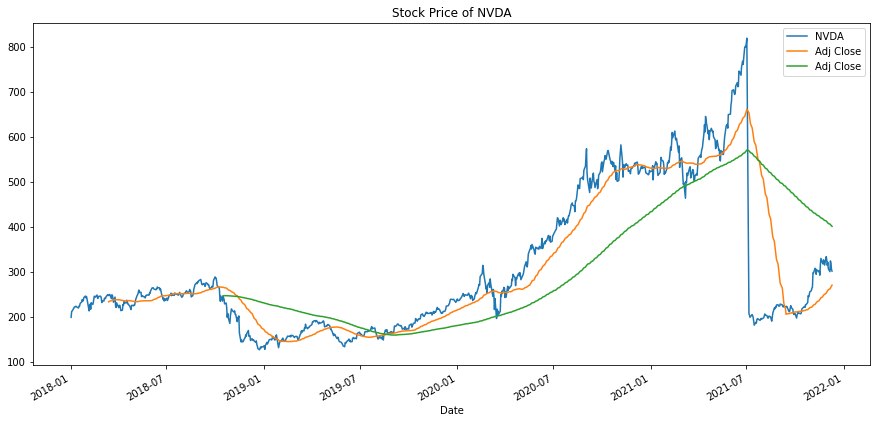

In [10]:
for index, val in enumerate(data):
  rolling_50 = val['Adj Close'].rolling(50).mean()
  rolling_200 = val['Adj Close'].rolling(200).mean()
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
  rolling_50.plot()
  rolling_200.plot()
  plt.title('Stock Price of ' + tickers[index])
  plt.legend()
  plt.show()

177.345 5.61
329 13.974
340.34 8.939
214.04 5.627
152.55 1.094
301.43 3.243


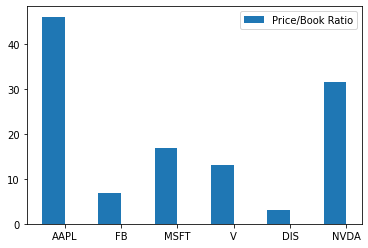

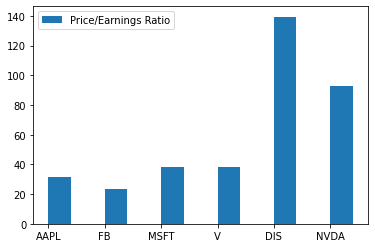

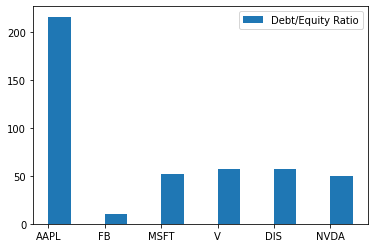

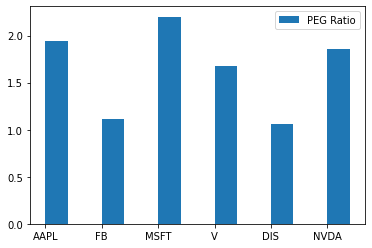

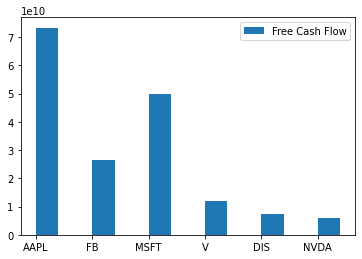

In [11]:
metric_data = []
for t in tickers:
  metric_data.append(yf.Ticker(t))

PB = []
PE = []
DE = []
PEG = []
FCF = []

for i in metric_data:
  PB.append(i.info['priceToBook'])
  print(i.info['regularMarketPrice'], i.info['trailingEps'])
  PE.append(i.info['regularMarketPrice']/i.info['trailingEps'])
  DE.append(i.info['debtToEquity'])
  PEG.append(i.info['pegRatio'])
  FCF.append(i.info['freeCashflow'])

X_axis = np.arange(len(tickers))

plt.bar(X_axis - 0.2, PB, 0.4, label = 'Price/Book Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PE, 0.4, label = 'Price/Earnings Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, DE, 0.4, label = 'Debt/Equity Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PEG, 0.4, label = 'PEG Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, FCF, 0.4, label = 'Free Cash Flow')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()


Based on the analysis performed above, AAPL, MSFT, and NVDA seem like they present the 3 best financial metrics, are trending upward, have strong correlation to each other, as a result I will purchase stocks of each for week 2. 

# WEEK 3: Long Short-Term Memory Model

I created a long short-term memory(LSTM) model and ran it for each of the tickers. The data is split approximately 60:40 for training/testing with a 45 day sliding window used to calculate the values for each day. I have tested several values for the number of units per each LSTM layer, the dropout rate used for each dropout layer, along with the number of epochs and the batch sizes. The values predicted are for the next 3 days with each additional predicted value appended to the data to be used for the following day.

This current iteration where prediction_days = 45, # units = 50, dropout rate = 0.15, # epochs = 50, batch size = 16 seems to perform well for AAPL, V, DIS with the RMSE values ranging from 5 - 8 with their corresponding R^2 values at 0.83 to 0.90+. However, for the rest of the stocks, it didn't seem to perform very well with the given set up. I plan on adjusting the respective hyper parameters in the following week to create a better fitting model. 
The 3 tickers that are recommended are also the only 3 that have a net positive change in today's stock value, so perhaps the model is too sensitive to the last few days that it is causing the spike. I will explore how to address this issue as well. 

In [47]:
def stock_prediction(index, data):
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

  prediction_days = 45
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50))
  model.add(Dropout(0.15))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=50, batch_size=16)
  test_start = dt.datetime(2020, 1, 1)
  test_end = dt.datetime(2021, 11, 30)

  test_data = web.DataReader(tickers[index], 'yahoo', test_start, test_end)
  actual_prices = test_data['Adj Close'].values

  total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)

  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])


  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print('shape ', x_test.shape)

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  forecast_input = test_data['Adj Close'].values.reshape(-1, 1)
  forecast_input = scaler.transform(forecast_input[-prediction_days:])

  for _ in range(3):
    x = forecast_input[-prediction_days:]
    x = x.reshape((1, prediction_days, 1))
    forecast_output = scaler.inverse_transform(model.predict(x))[0][0]
    forecast_input = np.append(forecast_input, forecast_output)
  forecast = forecast_input[prediction_days:]
  forecast = forecast.reshape(-1,1)
  print()
  p = []
  new_predict = []
  for i in predicted_prices:
    p.append(i[0])

  for i in predicted_prices:
    new_predict.append(float(i))

  for j in forecast:
    new_predict.append(float(j))
  rms = mean_squared_error(actual_prices, p, squared=False)
  print(rms)
  r2 = r2_score(actual_prices, p)
  print(r2)
  

  print(new_predict[-1])
  company = tickers[index]
  plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
  plt.plot(predicted_prices, color="orange", label=f"Predicted {company} Price")
  plt.title(f"{company} Share Price")
  plt.xlabel('Time')
  plt.ylabel(f'{company} Share Price')
  plt.legend()
  plt.show()
  return rms, r2, new_predict





  
  # print(actual_prices[-60:])
  # x_input = test_data['Adj Close']
  # x_input = x_input[-60:].values.reshape(-1, 1)
  # x_input = scaler.transform(x_input)
  # print(x_input)
  # print('shape2',x_input.shape)
  # x_input = np.array(x_input)
  # x_input = np.reshape(x_input, (1, 60, 1))
  # yhat = scaler.inverse_transform(model.predict(x_input))
  # print()
  # print(yhat)
  # print(predicted_prices[-1:])
  # real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
  # real_data = np.array(real_data)
  # real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  # print(real_data, len(real_data))

  # prediction = model.predict(real_data)
  # prediction = scaler.inverse_transform(prediction)
  # print(f"Prediction: {prediction}")

In [48]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2020, 1, 1)

lstm_result = []
train_data = []

for t in tickers:
  train_data.append(web.DataReader(t, 'yahoo', start, end))

Epoch 1/50
29/29 [==============================] - 7s 61ms/step - loss: 0.0286
Epoch 2/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0067
Epoch 3/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0053
Epoch 4/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0048
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0039
Epoch 7/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0040
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0036
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0042
Epoch 10/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0040
Epoch 11/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0033
Epoch 12/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0036
Epoch 13/50
29/29 [==================

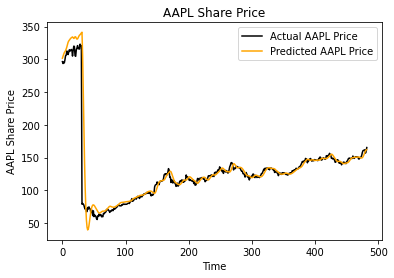

Epoch 1/50
29/29 [==============================] - 7s 62ms/step - loss: 0.0479
Epoch 2/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0143
Epoch 3/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0120
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0125
Epoch 5/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0123
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0108
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0115
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0101
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0094
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0090
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0088
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0086
Epoch 13/50
29/29 [==================

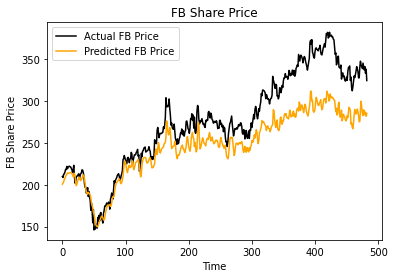

Epoch 1/50
29/29 [==============================] - 7s 63ms/step - loss: 0.0532
Epoch 2/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0056
Epoch 3/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0046
Epoch 4/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0050
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0039
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0045
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0035
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0038
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0036
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0028
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0034
Epoch 12/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0032
Epoch 13/50
29/29 [==================

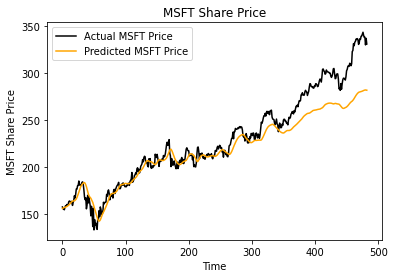

Epoch 1/50
29/29 [==============================] - 6s 61ms/step - loss: 0.0352
Epoch 2/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0066
Epoch 3/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0055
Epoch 4/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0047
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0052
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0049
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0044
Epoch 8/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0056
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0045
Epoch 10/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0040
Epoch 11/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0044
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0046
Epoch 13/50
29/29 [==================

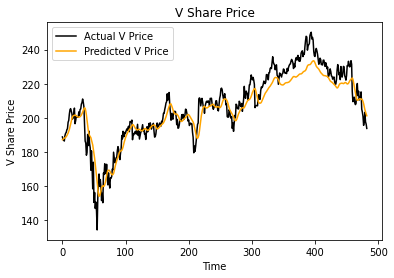

Epoch 1/50
29/29 [==============================] - 7s 61ms/step - loss: 0.0348
Epoch 2/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0090
Epoch 3/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0082
Epoch 4/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0081
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0093
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0095
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0068
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0075
Epoch 9/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0058
Epoch 10/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0071
Epoch 11/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0061
Epoch 12/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0055
Epoch 13/50
29/29 [==================

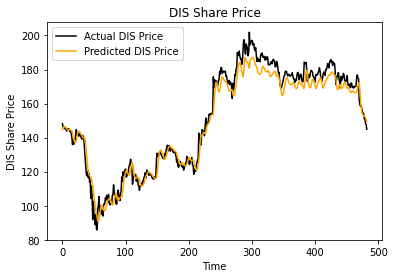

Epoch 1/50
29/29 [==============================] - 7s 63ms/step - loss: 0.0466
Epoch 2/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0121
Epoch 3/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0101
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0092
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0130
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0088
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0080
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0073
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0077
Epoch 10/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0070
Epoch 11/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0071
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0077
Epoch 13/50
29/29 [==================

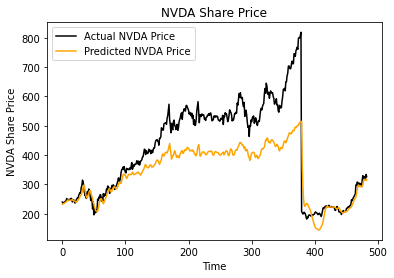

RMSE:19.864394943836327	R2:0.8650440385328674	last actual:155.75137329101562	weekly prediction: 498.7949523925781	projected profit/stock: 343.0435791015625
RMSE:35.032528879931434	R2:0.6198660302264591	last actual:288.17864990234375	weekly prediction: 493.58172607421875	projected profit/stock: 205.403076171875
RMSE:19.268685124997944	R2:0.8449030442324391	last actual:281.576171875	weekly prediction: 289.8600158691406	projected profit/stock: 8.283843994140625
RMSE:7.6340825712973315	R2:0.8652647592277948	last actual:206.46875	weekly prediction: 267.5257263183594	projected profit/stock: 61.056976318359375
RMSE:5.749541883466717	R2:0.9633489604439065	last actual:152.7621307373047	weekly prediction: 278.49224853515625	projected profit/stock: 125.73011779785156
RMSE:104.57946312354342	R2:0.5644016244184512	last actual:317.5023193359375	weekly prediction: 592.1865844726562	projected profit/stock: 274.68426513671875


In [49]:
for index, val in enumerate(train_data):
  r1, r2, f = stock_prediction(index, val)
  lstm_result.append([r1, r2, f])

for i in lstm_result:
  print('RMSE:{}\tR2:{}\tlast actual:{}\tweekly prediction: {}\tprojected profit/stock: {}'.format(i[0], i[1], i[2][-8], i[2][-1], i[2][-1]-i[2][-8]))

While the spike does seem unusual, for this week I will go with what is recommended by the model and purchase the 3 highest recommendations in FB, V, DIS 

# WEEK 4: Improve Long Short-Term Memory Model and Compare with Monte Carlo Simulation

I continued developing the LSTM model created last week and ran a grid search for each of the tickers to find the most optimal parameters, namely the size of the window used in the LSTM model along with the batch sizes. 

Furthermore, I first calculated the change in the daily return and visualized it using a histogram. Then for each ticker, I iterated through and ran a Monte Carlo Simulation using the following formula

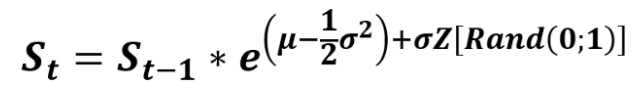

It shows that for each stock price of today, we look at yesterday's price times a certain daily return, which is calculated using the Brownian Motion. It uses an exponential function of e raised to the power of the drift + volatility to calculate the daily return.

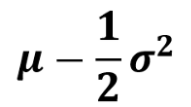

This portion of the exponent is called the drift - which is basically the expected return of the stock from the past

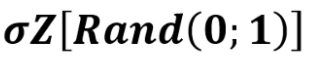

This portion is the volatility where the historical volatility is multiplied by a random noramlized variable to add variability to the data. When ran multiple times, this will ensure the spread in the paths of our simulations. 

# Grid search for the LSTM model

In [15]:
def stock_prediction_2(index, data, days, b_size):
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

  prediction_days = days
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50))
  model.add(Dropout(0.15))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=25, batch_size=b_size)
  test_start = dt.datetime(2020, 1, 1)
  test_end = dt.datetime(2021, 12, 10)

  test_data = web.DataReader(tickers[index], 'yahoo', test_start, test_end)
  actual_prices = test_data['Adj Close'].values

  total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)

  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])


  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print('shape ', x_test.shape)

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  forecast_input = test_data['Adj Close'].values.reshape(-1, 1)
  forecast_input = scaler.transform(forecast_input[-prediction_days:])

  for _ in range(1):
    x = forecast_input[-prediction_days:]
    x = x.reshape((1, prediction_days, 1))
    forecast_output = scaler.inverse_transform(model.predict(x))[0][0]
    forecast_input = np.append(forecast_input, forecast_output)
  forecast = forecast_input[prediction_days:]
  forecast = forecast.reshape(-1,1)
  print()
  p = []
  new_predict = []
  for i in predicted_prices:
    p.append(i[0])

  for i in predicted_prices:
    new_predict.append(float(i))

  for j in forecast:
    new_predict.append(float(j))
  rms = mean_squared_error(actual_prices, p, squared=False)
  print(rms)
  r2 = r2_score(actual_prices, p)
  print(r2)
  

  print(new_predict[-1])
  company = tickers[index]
  plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
  plt.plot(predicted_prices, color="orange", label=f"Predicted {company} Price")
  plt.title(f"{company} Share Price")
  plt.xlabel('Time')
  plt.ylabel(f'{company} Share Price')
  plt.legend()
  plt.show()
  return rms, r2, new_predict[-1], actual_prices[-1]





  
  # print(actual_prices[-60:])
  # x_input = test_data['Adj Close']
  # x_input = x_input[-60:].values.reshape(-1, 1)
  # x_input = scaler.transform(x_input)
  # print(x_input)
  # print('shape2',x_input.shape)
  # x_input = np.array(x_input)
  # x_input = np.reshape(x_input, (1, 60, 1))
  # yhat = scaler.inverse_transform(model.predict(x_input))
  # print()
  # print(yhat)
  # print(predicted_prices[-1:])
  # real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
  # real_data = np.array(real_data)
  # real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  # print(real_data, len(real_data))

  # prediction = model.predict(real_data)
  # prediction = scaler.inverse_transform(prediction)
  # print(f"Prediction: {prediction}")

In [ ]:
p_days = [15, 30, 45]
batch = [8, 16, 24, 32]
lstm_result = []


for index, val in enumerate(train_data):
  curr_list = []
  for i in p_days:
    for j in batch:
      r1, r2, f, ap = stock_prediction_2(index, val, i, j)
      curr_list.append([r1, r2, i, j, ap, f])
  lstm_result.append(curr_list)

print(lstm_result)
# for index, val in enumerate(lstm_result):
#   print('TICKER: {}\tRMSE: {:.4f}\tR2: {:.4f}\tnum_of_days: {}\tbatch_size: {}\tlast actual: {:.5f}\tweekly prediction: {:.2f}\tprojected profit/stock: {:.2f}'.format(tickers[index],val[0], val[1], val[2], val[3], val[4], val[5], val[5]-val[4]))

The output for the above cell is hidden, as it would be over a hundred page of the training print out. 

Result of the grid search ordered in ascending order of the RMSE value is shown below

In [22]:
for index, val in enumerate(lstm_result):
  print(tickers[index] + ':')
  for j in (sorted(val, key=lambda x:x[0])):
    print(j)
  print()

AAPL:
[20.371020016269803, 0.8569819107736014, 45, 8, 177.61000061035156, 173.21498107910156]
[21.1066484577521, 0.8464648875272202, 15, 8, 177.47999572753906, 173.64193725585938]
[21.319827573552676, 0.8433488468556833, 15, 16, 177.5821075439453, 166.4574432373047]
[21.471744338784557, 0.8411084779002582, 30, 8, 177.5883026123047, 176.642578125]
[22.066380462165807, 0.8321857246511898, 45, 16, 177.56680297851562, 167.74806213378906]
[23.422037492639056, 0.810933350766774, 30, 16, 177.60499572753906, 171.00929260253906]
[24.938597744644607, 0.78565617950106, 15, 24, 177.56019592285156, 167.23309326171875]
[25.34555182956773, 0.7786035416695742, 45, 24, 177.5500030517578, 170.69517517089844]
[26.12683740545779, 0.7647445885732304, 30, 32, 177.59219360351562, 170.65953063964844]
[26.5607532471478, 0.7568645185509684, 30, 24, 177.53500366210938, 170.87026977539062]
[27.486223080212216, 0.7396260033888141, 15, 32, 177.5399932861328, 168.9025421142578]
[29.04446129948071, 0.7092663847452886

Select the best set up for each ticker and display its output

[20.371020016269803, 0.8569819107736014, 45, 8, 177.61000061035156, 173.21498107910156]
Epoch 1/25
58/58 [==============================] - 8s 57ms/step - loss: 0.0168
Epoch 2/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0060
Epoch 3/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0056
Epoch 4/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0047
Epoch 5/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0040
Epoch 6/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0039
Epoch 7/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 8/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0041
Epoch 9/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0032
Epoch 10/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 11/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 12/25
58/58 [===========

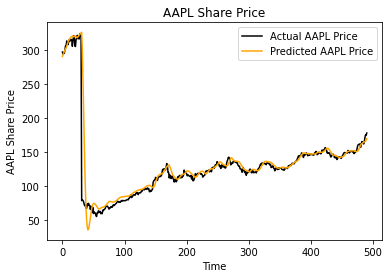

[27.181049095849858, 0.7697598153611631, 45, 8, 329.1099853515625, 297.0181884765625]
Epoch 1/25
58/58 [==============================] - 9s 58ms/step - loss: 0.0449
Epoch 2/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0155
Epoch 3/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0131
Epoch 4/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0119
Epoch 5/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0106
Epoch 6/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0105
Epoch 7/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0106
Epoch 8/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0100
Epoch 9/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0090
Epoch 10/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0080
Epoch 11/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0082
Epoch 12/25
58/58 [=============

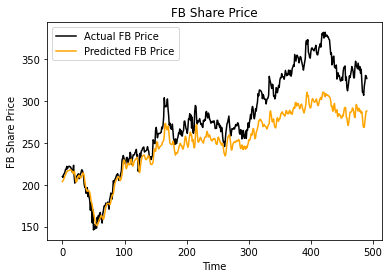

[23.514430520698006, 0.7811732383207344, 45, 16, 340.29998779296875, 276.0523376464844]
Epoch 1/25
29/29 [==============================] - 7s 63ms/step - loss: 0.0276
Epoch 2/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0059
Epoch 3/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0048
Epoch 4/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0043
Epoch 5/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0044
Epoch 6/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0038
Epoch 7/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0036
Epoch 8/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0036
Epoch 9/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0033
Epoch 10/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0047
Epoch 11/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0038
Epoch 12/25
29/29 [===========

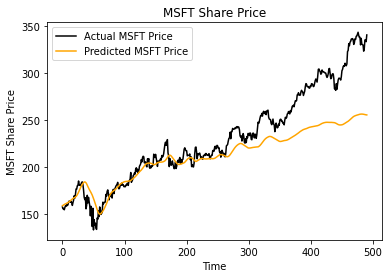

[8.93597037119555, 0.8128202142066077, 30, 16, 213.77999877929688, 199.3014373779297]
Epoch 1/25
30/30 [==============================] - 6s 42ms/step - loss: 0.0400
Epoch 2/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0058
Epoch 3/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0054
Epoch 4/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0048
Epoch 5/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0050
Epoch 6/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0058
Epoch 7/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0046
Epoch 8/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0047
Epoch 9/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0058
Epoch 10/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0049
Epoch 11/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0044
Epoch 12/25
30/30 [=============

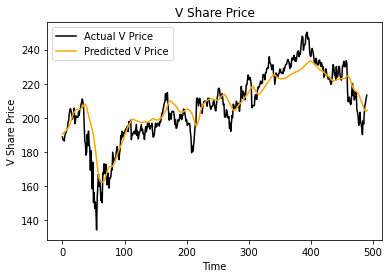

[5.98549331105728, 0.9596331565820013, 45, 8, 152.4499969482422, 153.15921020507812]
Epoch 1/25
58/58 [==============================] - 9s 58ms/step - loss: 0.0406
Epoch 2/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0088
Epoch 3/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0087
Epoch 4/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0079
Epoch 5/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0063
Epoch 6/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0066
Epoch 7/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0063
Epoch 8/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0057
Epoch 9/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0079
Epoch 10/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0055
Epoch 11/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0049
Epoch 12/25
58/58 [==============

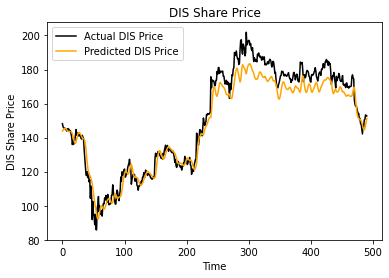

[13.243941721120065, 0.9558172006822035, 15, 8, 300.3699951171875, 302.2781982421875]
Epoch 1/25
61/61 [==============================] - 5s 16ms/step - loss: 0.0328
Epoch 2/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0103
Epoch 3/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0110
Epoch 4/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0096
Epoch 5/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0103
Epoch 6/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0088
Epoch 7/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0102
Epoch 8/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0077
Epoch 9/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0080
Epoch 10/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0066
Epoch 11/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0072
Epoch 12/25
61/61 [=============

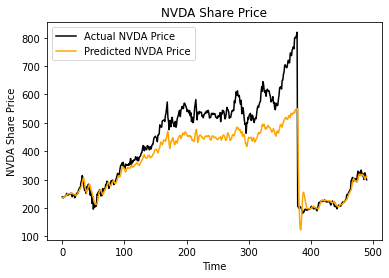

In [41]:
for index, val in enumerate(lstm_result):
  best = sorted(val, key=lambda x:x[0])[0]
  print(best)
  stock_prediction_2(index, train_data[index], best[2], best[3])

In [42]:
for index, val in enumerate(lstm_result):
  print(tickers[index])
  best = sorted(val, key=lambda x:x[0])[0]
  print('prediction for the week: {}'.format(best[-1] - best[-2]))

AAPL
prediction for the week: -4.39501953125
FB
prediction for the week: -32.091796875
MSFT
prediction for the week: -64.24765014648438
V
prediction for the week: -14.478561401367188
DIS
prediction for the week: 0.7092132568359375
NVDA
prediction for the week: 1.908203125


This week seems like it's predicting a lot of downs so for the short term, I should sell FB, MSFT, and V, as they are predicted to decrease the most.

# Monte Carlo Simulation

In [51]:
week4_data = []
week4_start = dt.datetime(2018, 1, 1)
week4_end = dt.datetime(2021, 11, 26)

for t in tickers:
  week4_data.append(web.DataReader(t, 'yahoo', week4_start, week4_end))

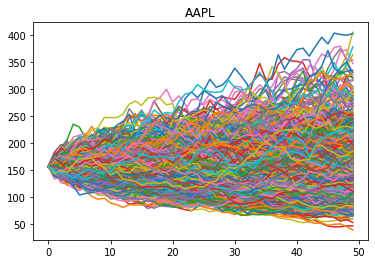

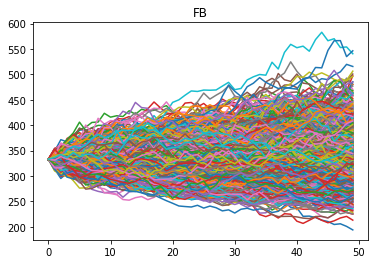

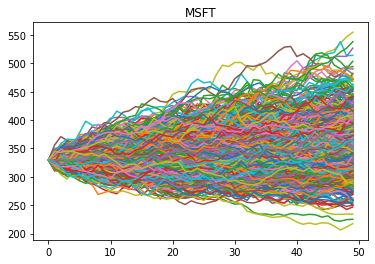

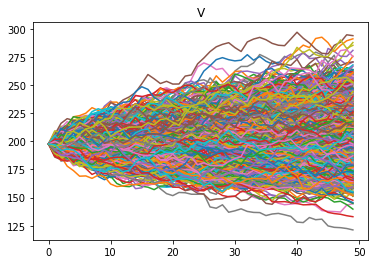

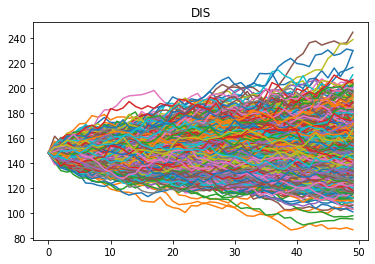

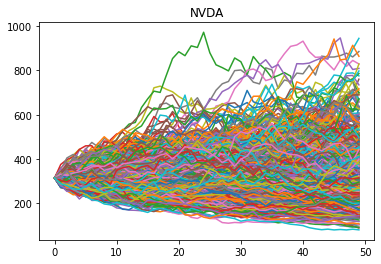

In [54]:
change_50 = []
for index, val in enumerate(week4_data):
  d = val['Adj Close']
  log_return = np.log(1+d.pct_change())
  # sns.histplot(log_return.iloc[1:], kde=True, stat="density")

  # plt.xlabel("Daily Return")
  # plt.ylabel("Frequency")
  # plt.show()
  u = log_return.mean()
  var = log_return.var()
  drift = u - (0.5*var)
  stdev = log_return.std()
  days = 50
  trials = 1000
  Z = norm.ppf(np.random.rand(days, trials)) #days, trials
  daily_returns = np.exp(drift + stdev * Z)
  price_paths = np.zeros_like(daily_returns)
  price_paths[0] = d.iloc[-1]
  for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
  plt.plot(price_paths)
  plt.title(tickers[index])
  plt.show()
  change_50.append([price_paths[0][0],np.mean(price_paths[-1])])

In [45]:
for index, val in enumerate(change_50):
  print('{}: last actual: {}\t50 day prediction: {}\tchange over 50 days: {}'.format(tickers[index], val[0], val[1], val[1]-val[0]))

AAPL: last actual: 177.34800720214844	50 day prediction: 175.37577947048447	change over 50 days: -1.9722277316639634
FB: last actual: 329.0262145996094	50 day prediction: 340.4624228570606	change over 50 days: 11.436208257451199
MSFT: last actual: 340.3299865722656	50 day prediction: 366.9548679256347	change over 50 days: 26.624881353369062
V: last actual: 214.1300048828125	50 day prediction: 221.71842415759016	change over 50 days: 7.588419274777664
DIS: last actual: 152.56680297851562	50 day prediction: 154.25677684048264	change over 50 days: 1.6899738619670188
NVDA: last actual: 301.6700134277344	50 day prediction: 307.56667140462633	change over 50 days: 5.896657976891959


The expected value for the 50 day prediction is calculated taking the average of the 1000 simulations ran. This provides us witha more long term view, and in the long run, FB, MSFT, and V are actually recommended as the highest changes over the 50 day period. 

Although the LSTM model recommended to sell on the short run, because I am more interested in long term investments, I will buy at the dip and hold as recommended by the Monte Carlo Simulation.